# Praca domowa 1 WdUM
### Jakub Niemyjski
### nr indeksu 311052

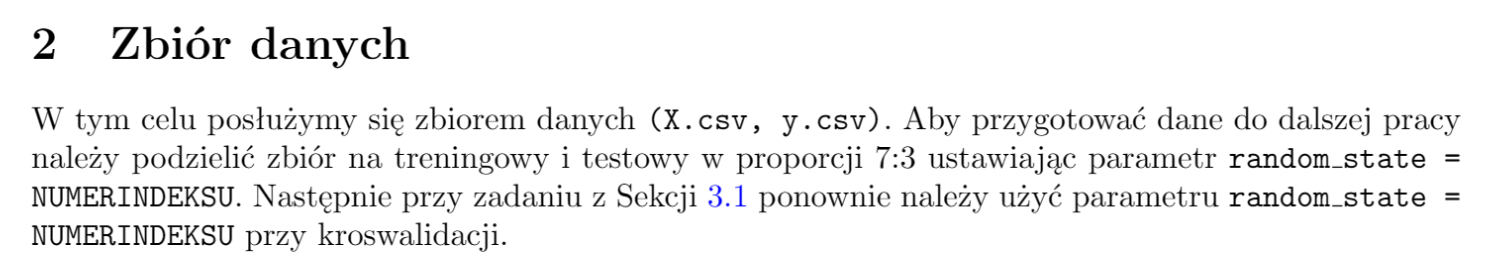


In [1]:
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# importujemy pakiety i wczytujemy dane
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')


In [3]:
# dzielimy zbiór na treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=311052)

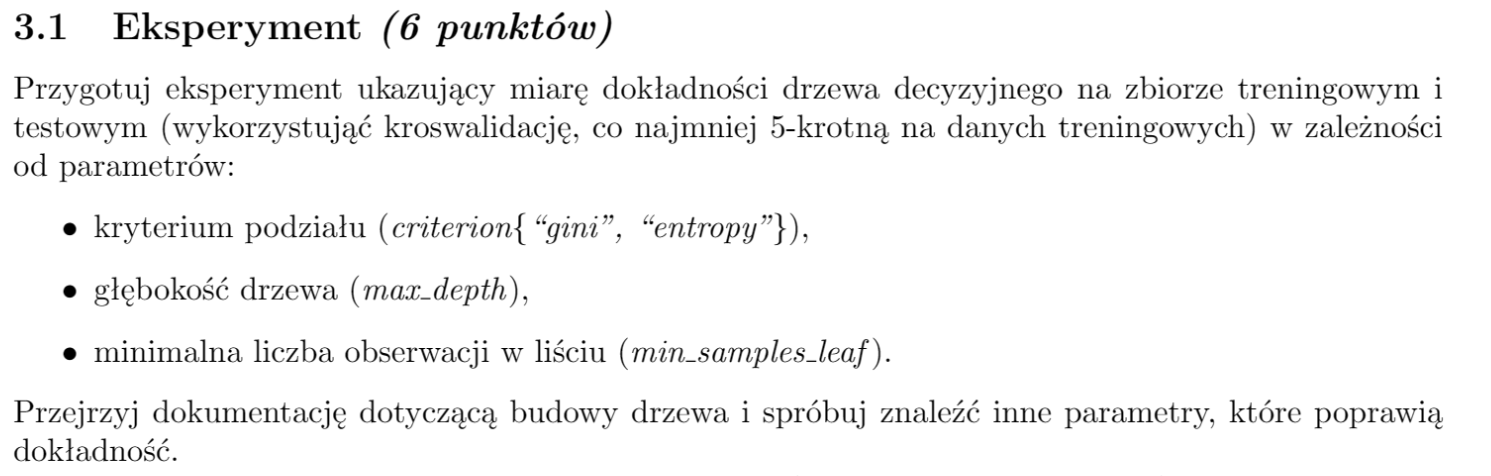

In [4]:
# tworzymy eksperyment
# definiujemy różne wartości parametru 'criterion' do przetestowania

criterions = ['gini', 'entropy']

In [5]:
# najlepsza dokładność modelu
best_accuracy = 0

In [6]:
# sprawdzamy różne kombinacje parametrów
for criterion in criterions:
    for max_depth in range(10, 15):
        for min_samples_leaf in range(50, 101, 10):

            Tree = tree.DecisionTreeClassifier(criterion = criterion, max_depth = max_depth, 
                                           min_samples_leaf = min_samples_leaf,  
                                           random_state = 311052)
            # wykonujemy 5-krotną kroswalidację na danych treningowych i obliczamy średnią dokładność
            scores = cross_val_score(Tree, X_train, y_train, cv=5)
            mean_accuracy = np.mean(scores)
            # zapisujemy najlepsze parametry
            if mean_accuracy > best_accuracy:
                best_accuracy = mean_accuracy
                best_criterion = criterion
                best_max_depth = max_depth
                best_min_samples_leaf = min_samples_leaf   
            # gdzie best_criterion, best_max_depth, best_min_samples_leaf, best_max_leaf_nodes to 
            # parametry przechowywujące najlepszą kombinacje pod względem dokładnodności modelu

In [7]:
best_accuracy

0.798

In [8]:
min_samples_split_accuracy_list = []

for i in range(100,1001,100):
        Tree = tree.DecisionTreeClassifier(criterion = criterion, max_depth = max_depth, 
                                       min_samples_leaf = min_samples_leaf,
                                       min_samples_split=i,    
                                       random_state = 311052)
        # wykonujemy 5-krotną kroswalidację na danych treningowych i obliczamy średnią dokładność
        scores = cross_val_score(Tree, X_train, y_train, cv=5)
        mean_accuracy = np.mean(scores)
        min_samples_split_accuracy_list.append(mean_accuracy)
        # zapisujemy najlepszy parametr
        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy

In [9]:
min_samples_split_accuracy_list

[0.7734285714285714,
 0.7734285714285714,
 0.7654285714285715,
 0.7555,
 0.7518571428571429,
 0.7469285714285714,
 0.7381428571428572,
 0.7361428571428571,
 0.7347857142857143,
 0.7351428571428571]

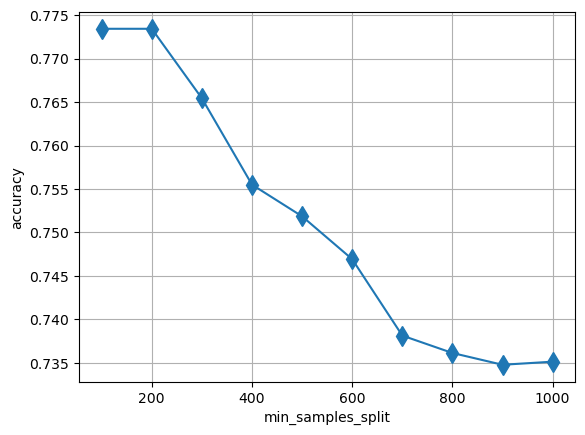

In [10]:
plt.plot(np.arange(100,1001,100), min_samples_split_accuracy_list, markersize=10, marker='d')
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.grid()
plt.savefig('wykres1.pdf')

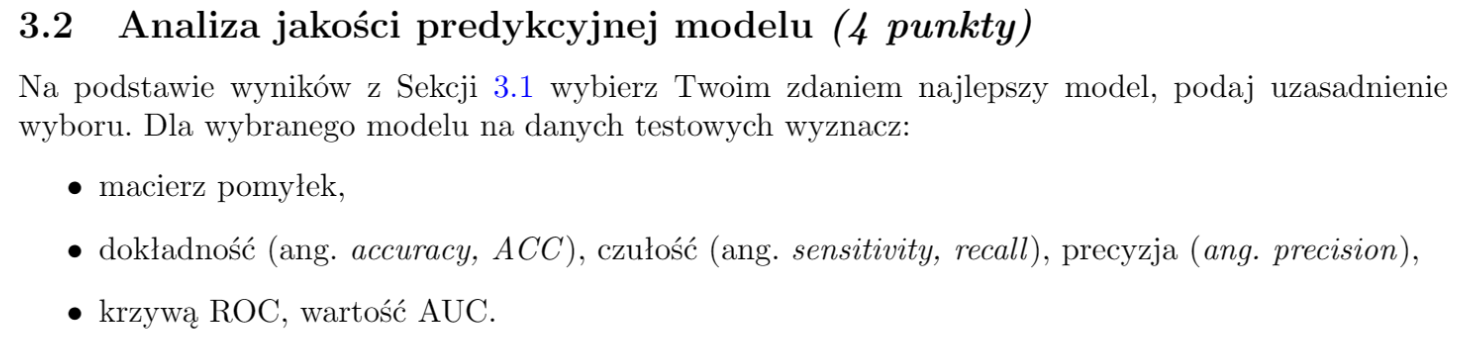

In [11]:
# trenujemy model na całym zbiorze treningowym, wykorzystując najlepsze parametry
final_tree = tree.DecisionTreeClassifier(criterion = best_criterion, max_depth = best_max_depth, 
                                    min_samples_leaf = best_min_samples_leaf,
                                        min_samples_split=100, random_state = 311052)
final_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=14, min_samples_leaf=50, min_samples_split=100,
                       random_state=311052)

In [12]:
# wykonujemy predykcję na całym zbiorze testowym
y_pred = final_tree.predict(X_test)

In [13]:
# oceniamy jakość predykcyjną modelu

# macierz pomyłek
confusion = confusion_matrix(y_test, y_pred)

In [14]:
confusion

array([[2473,  550],
       [ 548, 2429]], dtype=int64)

In [15]:
from sklearn.metrics import precision_score, recall_score

In [16]:
# dokładność
accuracy = final_tree.score(X_test, y_test)

In [17]:
accuracy

0.817

In [18]:
# precyzja
precision = round(precision_score(y_test, y_pred),4)

In [19]:
precision

0.8154

In [20]:
# czułość
sensitivity = round(recall_score(y_test, y_pred),4)

In [21]:
sensitivity

0.8159

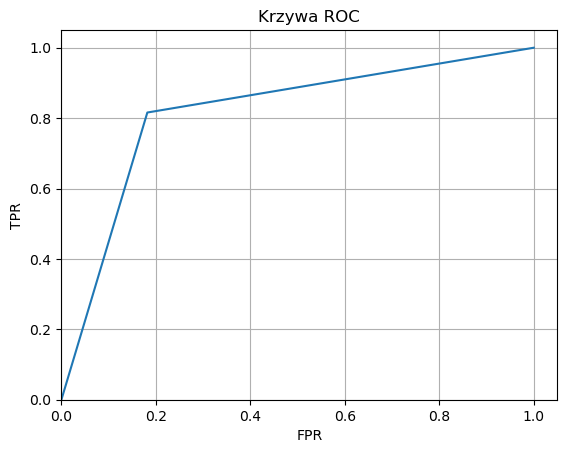

In [22]:
# krzywa ROC
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.title('Krzywa ROC')
plt.savefig('krzywaROC.pdf')
plt.show()

In [23]:
# wartość AUC
from sklearn.metrics import roc_auc_score
round(roc_auc_score(y_test, y_pred),4)

0.817